### 期待値-最大化法

**これまで、訓練データには異常標本が含まれていないか、含まれていたとしても圧倒的少数**  
であると仮定して異常検知のモデルを構築してきました。しかしながら現実的にはそのような仮定が許されないことがあります。  
今回は、訓練データのなかに異常標本が混ざっていると信じられる場合の処方箋をみていきます。  

**正規分布の線形結合のモデル**  
いま話を簡単にするため、系が何らかの１次元の観測値で表されるとし、  
訓練データとして、観測データ$D=\{x^{(n)}|n-1,...,N \}$が得られているとします。そして、正常な状態が、「ひと山」で表されていると信じます。  
ここで$D$が「雑音(ノイズ)」によって汚染されていると考えます。  
例えば、正常標本データと異常標本データが混ざり合ったデータと仮定したとき、山を表現するのに正規分布を利用するとすると、  
  
$$
p(x) = \pi_{0}N(x|\mu_{0}, \sigma_{0}^{2}) + \pi_{1}N(x|\mu_{1}, \sigma_{1}^{2})
$$
  
ここでは、$\pi_{0}$が正常標本が観測される確率で、$\pi_{1}$が異常標本が観測される確率を表します。  
xについての規格化条件という概念を導入すると、この分布が成り立つには、
  
$$
1=\int_{-\infty}^{\infty}dxp(x)=\pi_{0}\int_{-\infty}^{\infty}dxN(x|\mu_{0}, \sigma_{0}^{2}) + \pi_{1}\int_{-\infty}^{\infty}dxN(x|\mu_{1}, \sigma_{1}^{2}) = \pi_{0} + \pi_{1}
$$
  
  
正規分布の一次結合で表現される分布を、**混合正規分布**といいます。  
このモデルには、平均と分散をそれぞれ２つもち、それに$\pi_{0}, \pi_{1}$を含めると６つのパラメータがあることになります。  
全部式として書き出すと煩雑なので、次のように一般的には置きます。  
  
$$
\theta = (\pi_{0}, \mu_{0}, \sigma_{0}^{2}, \pi_{1}, \mu_{1}, \sigma_{1}^{2})^{T}
$$
  
このようにベクトルとして表現します。  
これをいつもの最尤推定で決めようとしましょう。素朴に、対数尤度$L(\Theta | D)$を書き下ろすと、  
  
$$
L(\Theta | D) = \sum_{n=1}^{N}In\left \{ \pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2}) + \pi_{1}N(x^{(n)}|\mu_{1}, \sigma_{1}^{2}) \right \}
$$
  
そして、いつものようにパラメータで微分をします。そして、それがゼロになることを考えると、かつ$\mu_{0}$について考えると、  
  
$$
0 = \frac{\partial L}{\partial \mu_{0}} = \frac{1}{\sigma_{0}^{2}}\sum_{N}{n=1}\frac{\pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2})(x^{(n)}-\mu_{0})}{\pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2}) + \pi_{1}N(x^{(n)}|\mu_{1}, \sigma_{1}^{2})}
$$
  

これは、未知のパラメータが分母にも分子にも出てきて、しかも分数を$N$項加えるという複雑な式となります。  
今までは最尤推定をしていましたが...ちょっと最尤推定ではパラメータを決めるのは難しくなってきます。  
そこで**期待値-最大化**(expection-maximization)、**EM**とも呼ばれる手法を利用します。

**期待値ステップ**  
今までは、最尤推定でもパラメータを推定できていましたが、今回は各観測値$x^{(n)}$が２つの正規分布の山のどちらかから観測されているか  
がわからないことが、この複雑な式で表現されています。ここで、どこの山から出てきたのかを考慮する必要があるという点が重要となります。  
仮想的に、データ$x^{(n)}$の帰属先を表す変数$z^{(n)}$を導入してみます。つまり、$z^{(n)}=0$ならば$x^{(n)}$は「０の山」出身で、  
$z^{(n)}=1$ならば$x^{(n)}$は「1の山」出身と考えます。  
この仮想的な変数を使って混合正規分布の対数尤度を書くとすれば下記のようになります。  
  
$$
L(\Theta | Z, D) = \sum_{n=1}^{N}\left [ \delta(z^{(n)},0)In\left \{ \pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2})\right \} + \delta(z^{(n)},1) In \left \{\pi_{1}N(x^{(n)}|\mu_{1}, \sigma_{1}^{2}) \right \} \right ]
$$
  
ただし、一般に$\delta(a,b)$はクロネッカーのδといいます。$a=b$のときにのみ$1$, その他では$0$となる関数です。  
$Z$は$z^{(1)}, ... , z^{(N)}$をまとめた表記になります。  
期待値-最大化法の名前は、この値が不明な仮想的な変数$z^{(n)}$に依存する$\delta(z^{(n)}, \bullet)$の値を、ある種の期待値として"とりあえず"与え  
それをもとに、尤度最大化により他のパラメータを求める、という手順に由来しています。  
「ある種の期待値」については、第４回で説明しますが、いったんは直感的に捉えていきます。  
まず、$\delta(z^{(n)}, 0)$という量は「0の山」出身であれば、1となる関数ですから、その期待値は、「第n標本が『０の山』出身である確率」を  
表しています。属する山の強さを表す$\pi_{0}$, $\pi_{1}$という量を考慮すれば、  
  
$$
\left [ \delta(z^{(n)},0) の期待値 \right ] : \left [ \delta(z^{(n)},1) の期待値 \right ] = \left [ \pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2}) \right ] : \left [ \pi_{1}N(x^{(n)}|\mu_{1}, \sigma_{1}^{2}) \right ] 
$$
  
としてよく、今$\delta(Z^{(n)},i)$の期待値を$q_{i}^{(n)}$とすれば$(i=0,1)$、この比例式から  
  
$$
q_{i}^{(n)} = \frac{1}{\sigma_{0}^{2}}\sum_{N}{n=1}\frac{\pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2})}{\pi_{0}N(x^{(n)}|\mu_{0}, \sigma_{0}^{2}) + \pi_{1}N(x^{(n)}|\mu_{1}, \sigma_{1}^{2})}
$$
  
のようにして変数を求めることが可能となります。ここで、$q_{i}^{n}$は$x^{(n)}$が$i$の山の出身である確率を返します。  
このことを強調して**帰属度**といいます。  
いまだこの式には未知数の変数を含みますが、最大化ステップを繰り返していくことで、交互に計算を繰り返すことで、   
真の値に近づいていくことを期待する、ということです。

**最大化ステップ**
あとは、素朴に微分していきます。途中の式は割愛しますが、パラメータ$\hat \pi_{i}$は
$$
\hat \pi_{i} = \frac{1}{N} \sum_{n=1}^{N}q_{i}^{(n)}
$$
  
**１次元混合正規分布の期待値-最大化法**
1) パラメータ${\pi_{i}, \mu_{i}, \sigma_{i}^{2}(i=1,2,...,K)}$の初期値を適当に与える  
2) データ${x^{n}}$の、山$i$への帰属度$q_{i}^{(n)}$を求める  
3) ${q_{i}^{(n)}}$の値をもとに、パラメータをその都度、算出する  
4) 値が収束していなければ、2)に戻る

In [2]:
# -*- coding: utf-8 -*-

# 正常標本と異常標本の混合正規分布から、期待値-最大化法（EM法）によりそれぞれの正規分布のパラメータを推測する。
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt

In [3]:
N = 1000    # 標本数

mu0 = 3.0   # 正常標本の平均
mu1 = 0.0   # 異常標本の平均
sig0 = 0.5  # 正常標本の標準偏差
sig1 = 3.0  # 異常標本の標準偏差
pi0 = 0.6   # 正常標本の出現率
pi1 = 0.4   # 異常標本の出現率

In [5]:
# 混合正規分布モデルを作成
n0 = norm.rvs(mu0, sig0, size=int(N*pi0))    # 正常標本
n1 = norm.rvs(mu1, sig1, size=int(N*pi1))    # 異常標本

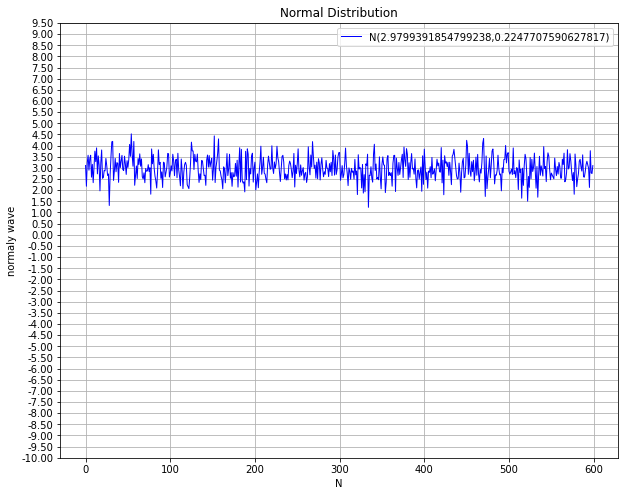

In [31]:
# 正常標本の分布
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(n0,'-', color='blue', linewidth=1.0, label="N("+str(mu0) + "," + str(sig0**2) + ")")
ax.set_title("Normal Distribution")
yticks = np.arange(-10.0, 10.0, 0.5)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('normaly wave')
plt.show()

In [69]:
label = [(i+1)*0.01-10 for i in range(10000)]
data_new = []
for i in range(len(label)-1):
    for j in n0:
        if j >= label[i] and j<label[i+1]:
            data_new.append(label[i])

In [70]:
import collections
c = collections.Counter(data_new)
weight_class = []
class_count = []
for i, j in c.most_common():
    weight_class.append(i)
    class_count.append(j)

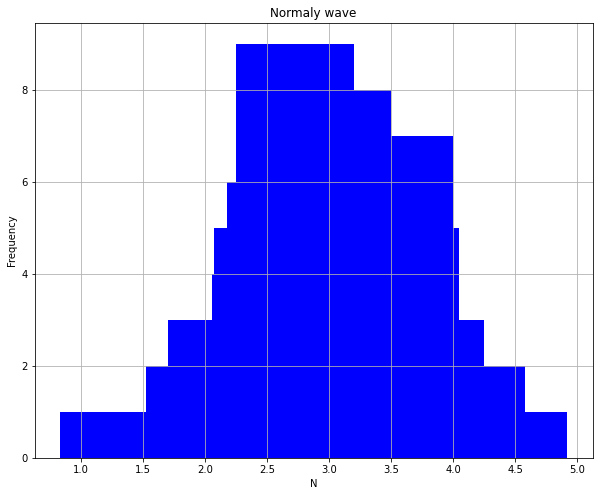

In [71]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid()
ax.bar(weight_class, class_count, color='blue')
ax.set_title("Normaly wave")
ax.set_xlabel('N')
ax.set_ylabel('Frequency')
plt.show()

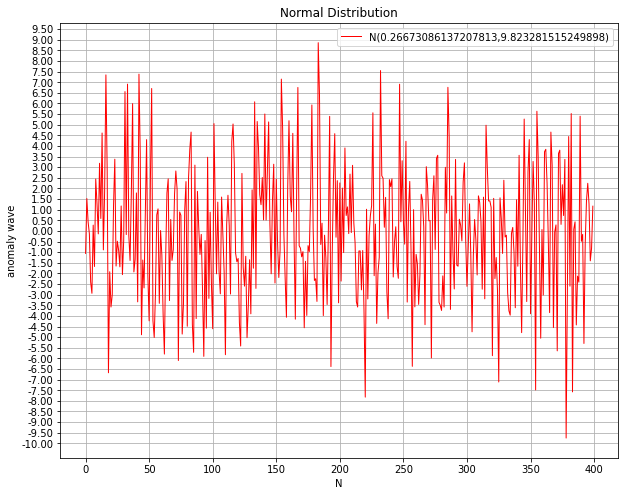

In [32]:
# 異常標本の分布
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(n1,'-', color='red', linewidth=1.0, label="N("+str(mu1) + "," + str(sig1**2) + ")")
ax.set_title("Normal Distribution")
yticks = np.arange(-10.0, 10.0, 0.5)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('anomaly wave')
plt.show()

In [72]:
data_new = []
for i in range(len(label)-1):
    for j in n1:
        if j >= label[i] and j<label[i+1]:
            data_new.append(label[i])

In [73]:
c = collections.Counter(data_new)
weight_class = []
class_count = []
for i, j in c.most_common():
    weight_class.append(i)
    class_count.append(j)

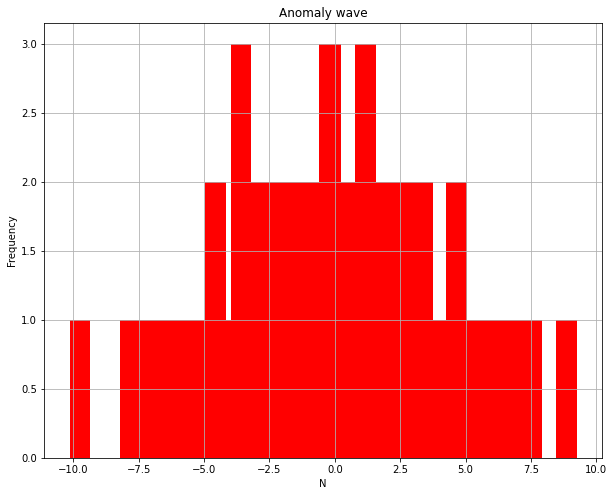

In [74]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid()
ax.bar(weight_class, class_count, color='red')
ax.set_title("Anomaly wave")
ax.set_xlabel('N')
ax.set_ylabel('Frequency')
plt.show()

In [75]:
# 正常データと異常データを組み合わせて、ランダムシャフルする
n = np.concatenate([n0, n1])    # 混合
np.random.shuffle(n)            # シャッフル

No handles with labels found to put in legend.


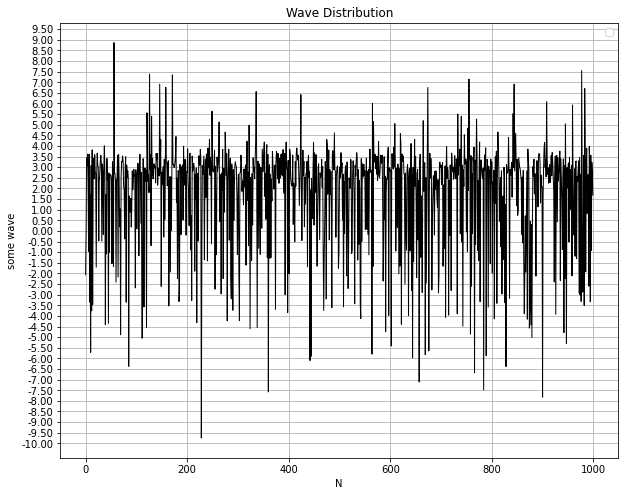

In [77]:
# 正常標本と異常標本が混ざった分布
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(n,'-', color='black', linewidth=1.0)
ax.set_title("Wave Distribution")
yticks = np.arange(-10.0, 10.0, 0.5)
yticklabels = ["%.2f" % x for x in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('some wave')
plt.show()

In [79]:
data_new = []
for i in range(len(label)-1):
    for j in n:
        if j >= label[i] and j<label[i+1]:
            data_new.append(label[i])

In [80]:
c = collections.Counter(data_new)
weight_class = []
class_count = []
for i, j in c.most_common():
    weight_class.append(i)
    class_count.append(j)

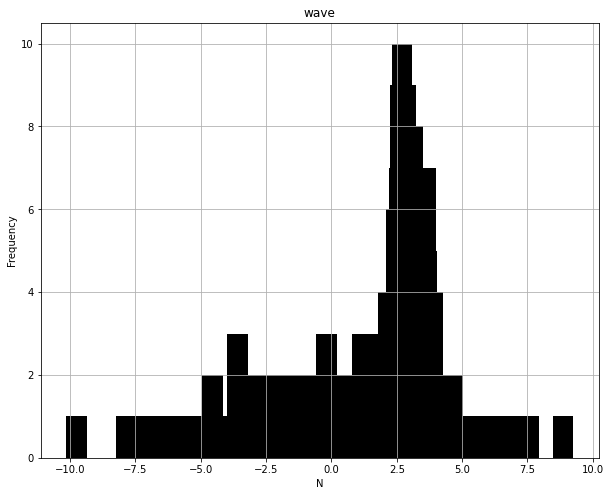

In [81]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.grid()
ax.bar(weight_class, class_count, color='black')
ax.set_title("wave")
ax.set_xlabel('N')
ax.set_ylabel('Frequency')
plt.show()

この２混合正規分布データから、期待値-最大化法を用いて、雑音(ノイズ)をうまく取り除けるかどうかを試していきます。  
データは、平均$mu_{0}=3$, 標準偏差$sig_{0}=0.5$の正規分布、雑音成分として平均$mu_{1}$, 標準偏差$sig_{1}=3$の正規分布を設定し、  
両者を$(\pi_{0}, \pi_{1})=(0.6, 0.4)$で混合したものになります。

まず初期値を与えます。  
ここでは$(\pi_{0}, \pi_{1})=(0.5, 0.5), (\mu_{0}, \mu_{1})=(5.0, -5.0), (\sigma_{0}, \sigma_{1})=(1.0, 5.0)$

In [6]:
# 初期値
pi0 = 0.5       
pi1 = 0.5
mu0 = 5.0
mu1 = -5.0
sig0 = 1.0
sig1 = 5.0

結果を格納するための箱(空のリスト)を用意します

In [7]:
# 結果格納リスト
pi0_list = []
pi1_list = []
mu0_list = []
mu1_list = []
sig0_list = []
sig1_list = []

In [8]:
# 期待値-最大化法
ite = range(20) # 反復回数

for i in ite:
    # 帰属度を計算
    piN0 = norm.pdf(x=n, loc=mu0, scale=sig0)
    piN1 = norm.pdf(x=n, loc=mu1, scale=sig1)
    qn0 = piN0 / (piN0 + piN1)
    qn1 = piN1 / (piN0 + piN1)

    # パラメータを計算
    pi0 = qn0.sum() / N
    pi1 = qn1.sum() / N
    mu0 = (qn0 * n).sum() / (N * pi0)
    mu1 = (qn1 * n).sum() / (N * pi1)
    sig0 = math.sqrt((qn0 * (n - mu0) * (n - mu0)).sum() / (N * pi0))
    sig1 = math.sqrt((qn1 * (n - mu1) * (n - mu1)).sum() / (N * pi1))

    # 結果を格納
    pi0_list.append(pi0)
    pi1_list.append(pi1)
    mu0_list.append(mu0)
    mu1_list.append(mu1)
    sig0_list.append(sig0)
    sig1_list.append(sig1)


print("正常モデル pi={0}, mu={1}, sig={2}".format(pi0, mu0, sig0))
print("雑音モデル pi={0}, mu={1}, sig={2}".format(pi1, mu1, sig1))

正常モデル pi=0.5459676375121583, mu=2.9799391854799238, sig=0.47409994628008734
雑音モデル pi=0.45403236248784173, mu=0.26673086137207813, sig=3.1342114662622715


２０回反復して計算させた結果、パラメータ$\theta = (\pi_{0}, \mu_{0}, \sigma_{0}^{2}, \pi_{1}, \mu_{1}, \sigma_{1}^{2})^{T}$が
ある値にそれぞれ収束していることを確認します。

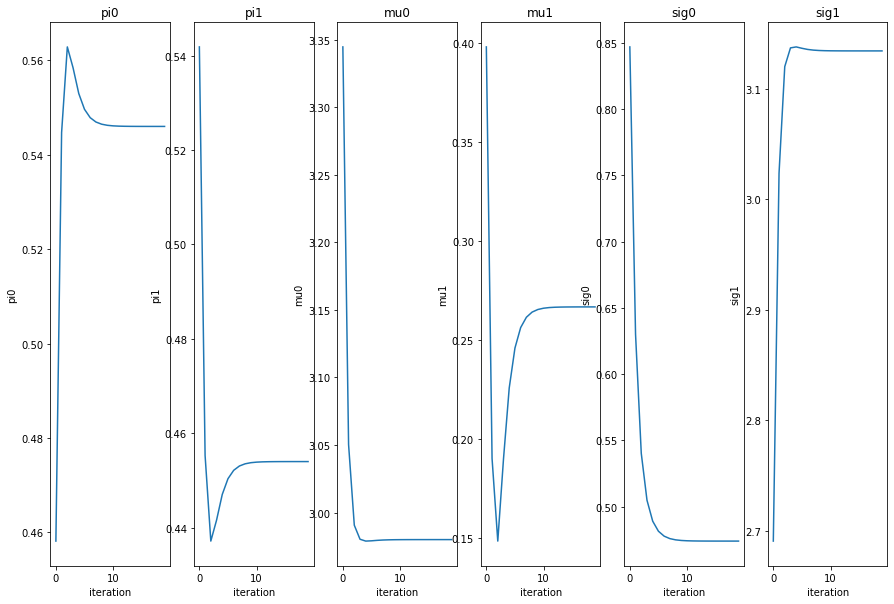

In [83]:
# プロット
plt.figure(figsize=(15,10))
plt.subplot(1, 6, 1)
plt.title("pi0")
plt.xlabel("iteration")
plt.ylabel("pi0")
plt.plot(ite, pi0_list)

plt.subplot(1, 6, 2)
plt.title("pi1")
plt.xlabel("iteration")
plt.ylabel("pi1")
plt.plot(ite, pi1_list)

plt.subplot(1, 6, 3)
plt.title("mu0")
plt.xlabel("iteration")
plt.ylabel("mu0")
plt.plot(ite, mu0_list)

plt.subplot(1, 6, 4)
plt.title("mu1")
plt.xlabel("iteration")
plt.ylabel("mu1")
plt.plot(ite, mu1_list)

plt.subplot(1, 6, 5)
plt.title("sig0")
plt.xlabel("iteration")
plt.ylabel("sig0")
plt.plot(ite, sig0_list)

plt.subplot(1, 6, 6)
plt.title("sig1")
plt.xlabel("iteration")
plt.ylabel("sig1")
plt.plot(ite, sig1_list)

plt.show()

### 分布が一山にならない場合: 近傍距離に基づく方法
正規分布やガンマ分布を用いた異常検知手法では、まずデータ$D$に確率分布$p(x)$を当てはめ、典型的には負の対数尤度$-Inp(x^{'})$が大きい場合に  
$x^{'}$を異常と判定していました。負の対数尤度が大きいということは$p(x^{'})$が小さいということを意味します。  
これは復習にもなりますが、確率が「薄い」ところに$x^{'}$がきたら、それは異常である可能性が高く、逆に「濃い」ところでは正常である可能性が  
高いということを意味しています。  
この直感を素直に表現したものを、近傍距離に基づく異常判定法となります。  
今、訓練データがいつものように$M$次元データ$N$個からなる$D={x^{(1)},...,x^{(N)}}$が与えられており、新たに観測した$x^{'}$の異常を判定したい  
としましょう。このとき、x^{'}を中心とした$M$次元の球を考えます。  
そうすると、次の２つの異常判定基準が考えられます。  
1) 球の半径を決めたとき、その球の中に入る標本の数$k$がある基準以下ならば、$x^{'}$は異常  
2) 観測値$x^{'}$に近い順に$k$個の標本を選んだとき、それらを囲む球の半径$\epsilon_{k}$がある基準値以上ならば${x^{'}}$は異常  
細かい数学的な導出はここでは省略しますが、$M$次元空間における球の体積$V_{M}(\epsilon, x^{'})$は、半径$\epsilon$の$M$乗に比例するので、  
負の対数尤度で異常度を定義すると、
  
$$
a(x^{'}) = -Inp(x^{'}) = -Ink + MIn\epsilon + (定数)
$$
  
となります。$\epsilon$を固定すれば$k$が小さい方が異常度が高くなり、$k$を固定すれば$\epsilon$が大きい方が異常度が高いことを表現しています。  
このような手法を一般的に、**k近傍法**または**ε近傍法**といいます。  
  
**近傍法による異常検知**  
異常が含まれないと信じられるデータセット$D$に対して、標本間の距離の尺度を決めます。(通常はユークリッド距離かマハラノビス距離)  
1) k基準: 何らかの方法で適切な$\epsilon$を決める。また、近傍数の閾値$k_{th}$を与える。・新たな観測値$x^{'}$に対して、半径$\epsilon$の範囲に入る標本を$D$から選ぶ。・その標本の数$k$が閾値$k_{th}$を下回ったら、$x^{'}$は異常。  
2) $\epsilon$基準: 何らかの方法で適切な$k$を決める、また半径の閾値$\epsilon_{kh}$を与える。・新たな観測値$x^{'}$に対して、k近傍となる標本を$D$から選ぶ。・それらを取り囲む最小の半径$\epsilon$を求める。それが$\epsilon_{kh}$を上回ったら、$x^{'}$は異常。
  
ここで**局所外れ値度**を考える必要があります。  
k近傍法の弱点は、データの分布する領域に極端な濃淡がある場合、適切な、最適な$k$を求めることが難しいことです。  
そのときに、局所外れ値度(local outlier factor: **LOF**)が有効となってきます。(ここでは紹介のみに留めます。)  
**カーネル密度推定**や、**動径基底関数展開**、**バンド幅**といった数学的な定理を学ばないといけないので、こちらは別枠でNotebook形式でまとめます。

In [12]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

# 観測データを取得
df = pd.read_csv("./DATA/Davis.csv")
weight = df["weight"]
height = df["height"]

X = pd.concat([weight, height], axis=1) # 標本数 * 次元数(2)のデータ行列

In [13]:
X = np.array(X)

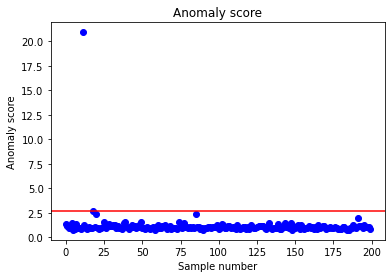

In [14]:
# 2点間の距離を計算
def calc_distance(x1, x2):
    return math.sqrt((x2[0] - x1[0]) ** 2 + (x2[1] - x1[1]) ** 2)

# targetからの距離によってdataをソートする
def sort_by_distance(data, target):
    tmp_list = list(data)
    tmp_list.sort(key=lambda x:calc_distance(target, x))
    return np.array(tmp_list)

# k近傍データと最小半径Ekを計算
# data: targetを含まないデータ
def get_k_nearest_neighbers_and_radius(k, data, target):
    sorted_data = sort_by_distance(data, target)
    return sorted_data[:k], calc_distance(target, sorted_data[:k][-1])

# 近傍有効距離を計算
# data: u, udashを含まないデータ
def calc_reachability_distance(k, data, u, udash):
    nearest_neighbers_u, Ek_u = get_k_nearest_neighbers_and_radius(k, data, u)
    nearest_neighbers_udash, Ek_udash = get_k_nearest_neighbers_and_radius(k, data, udash)
    dist = calc_distance(u, udash)
    lk_u_udash = 0.0
    if dist <= Ek_u and dist <= Ek_udash:
        lk_u_udash = Ek_udash
    else:
        lk_u_udash = dist
    return lk_u_udash
    
# targetの周りのk近傍にわたる近傍有効距離の平均値dk(target)を計算
# data: targetを含まないデータ
def calc_k_nearest_mean_distance(k, data, target):
    # targetのk近傍データを取得
    nearest_neighbers_target, Ek_target = get_k_nearest_neighbers_and_radius(k, data, target)
    total_lk = 0.0  # 近傍有効距離の合計値
    # 近傍点を走査
    for i, neighber in enumerate(nearest_neighbers_target):
        # データ全体から近傍点neighberを除く
        data_without_neighber = sort_by_distance(data, neighber)[1:]
        # 近傍有効距離を計算
        lk_target_neighber = calc_reachability_distance(k, data_without_neighber, target, neighber)
        # 合計値に加算
        total_lk += lk_target_neighber
    return total_lk / k # 平均値を計算 


# 局所外れ値度に基づくk近傍法による異常検知
k = 5
aLOF = []   # サンプル毎の異常値リスト

# サンプルの個々のデータを走査
for i, p in enumerate(X):
    # データ全体からpを除く
    data_without_p = np.delete(X, i, axis=0)    

    # dk(p)を計算
    dk_p = calc_k_nearest_mean_distance(k, data_without_p, p)

    # pのk近傍データを取得
    neighbers_p, Ek_p = get_k_nearest_neighbers_and_radius(k, data_without_p, p)

    # 異常度aLOF(p)を計算
    aLOF_p = 0.0
    for j, q in enumerate(neighbers_p):
        # データ全体からp, qを除く
        data_without_pq = sort_by_distance(data_without_p, q)[1:]
        
        # dk(q)を計算
        dk_q = calc_k_nearest_mean_distance(k, data_without_pq, q)
        if dk_q != 0.0:
            aLOF_p += (dk_p / dk_q)

    aLOF_p = aLOF_p / k
    aLOF.append(aLOF_p)

# 0.01パーセンタイルで閾値を設定
sorted_a = np.sort(aLOF)[::-1]         # 降順にソート　
th = sorted_a[(int(len(aLOF) * 0.01 - 1))]  # 異常度の上位1%分位点に置ける異常度

# プロット
plt.title("Anomaly score")
plt.xlabel("Sample number")
plt.ylabel("Anomaly score")
plt.plot(range(len(aLOF)), aLOF, "bo")
plt.axhline(y=th,color='red')
plt.show()

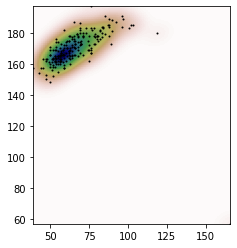

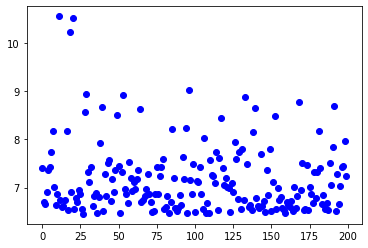

[[166  57]
 [ 76 197]
 [119 180]]


In [35]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

# 観測データを取得
df = pd.read_csv("./DATA/Davis.csv")
weight = df["weight"]
height = df["height"]

# カーネル密度推定
values = np.vstack([weight, height])
kernel = gaussian_kde(values)

# カーネル密度推定結果をグラフ化
weight_max = weight.max()
weight_min = weight.min()
height_max = height.max()
height_min = height.min()
X, Y = np.mgrid[weight_min:weight_max:100j, height_min:height_max:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[weight_min, weight_max, height_min, height_max])
ax.plot(weight, height, 'k.', markersize=2)
ax.set_xlim([weight_min, weight_max])
ax.set_ylim([height_min, height_max])
plt.show()

# 異常度を計算
a = -kernel.logpdf(values)
plt.plot(range(len(a)), a, "bo")
plt.show()

# 異常度が高いサンプルを抽出
print(values[:,a>10].T)

### 分布が一山にならない場合: クラスタリングに基づく方法
クラスタリングとは、標本集合が与えられたときに、類似する標本同士を「束ねて」塊にすることです。  
グルーピングといっても良いです。例えば、自動車の各時刻におけるセンサーデータの分布をモデル化して、異常検知を行う場合を考えます。  
交差点で信号待ちをして静止している状態と、高速道路で巡航している状態とではデータの分布は明らかに異なるはずですが、車が壊れていない限り  
どちらも正常な状態と判定されることになります。自動車に限らず多くの機械系は性質の異なる複数の稼働モードをもちます。  
現場の技術者からしてみれば、そのような系から長時間たくさんのデータ分布をモデル化するための自然な流れは、モードごとにデータのばらつき  
を理解して、その上で異常かどうかを判定する、という流れになります。今回は、そんな背景のための機械学習におけるクラスタリングの代表的な  
手法をみていきます。  
  
#### K平均法
k平均法は最も有名かつ**手軽な**クラスタリング手法です。  
いつものように、$M$次元の観測値$N$個からなるデータ$D=\{x^{(1)}, ... , x^{(N)} \}$が与えられているとします。  
k平均法によるクラスタリングの目的は、$D$の中の$N$個の標本のそれぞれを、k個のクラスターのどれかに割り当てることです。  
k平均法ではそれを、クラスターへの割当てと、クラスター中心ベクトルの更新を**反復**することで行います。手順は次のようになります。  
  
**k平均法によるクラスタリング手順**  
何らかの手段でクラスター中心を大体予想しておいて、それらを$\mu_{1}, ... , \mu_{k}$とします。  
1) $n=1, ... , N$について、$x^{n}$に一番近いクラスター中心を見つけ、そのクラスターに$x^{(n)}$を所属させます。  
2) $c=1, ... , k$について、クラスター中心ベクトル$\mu_{c}$を、所属メンバーの平均として次のように計算します。
$$
\mu_{c} = \frac{1}{N_{c}} \sum_{cの所属メンバー}x^{(n)}
$$
3) 1)に戻る

基本的には、これだけ。
少しだけ理論的なお話をします。  
いま標本$x^{(n)}$が属するクラスターのことを変数$z^{(n)}$で表します。例えば、$x^{(4)}$が第２クラスターに属するのならば、$z^{(4)}=2$という風に。  
これを使うと、上記2)の式がすっきりと、
$$
\mu_{c} = \frac{1}{N_{c}} \sum_{n=1}^{N}\delta(z^{(n)}, c)x^{(n)}
$$
と表すことができます。  
この$z^{(n)}$を用いて、次の量を考えます。  
$$
L = \sum_{c=1}^{k} \left \{ \sum_{n=1}^{N}\delta(z^{(n)}, c)\parallel x^{(n)} - \mu_{c} \parallel ^{2} \right \}
$$
$\parallel \bullet \parallel ^{2}$はユークリッド距離の２乗を表します。$\{ \bullet \}$の中身は、クラスター$c$について、そのクラスターのメンバー  
がどれだけクラスター中心から離れているかの**度合い**を合計したものです。言い換えれば、位置エネルギーの合計のようなものです。  
この値が小さい方がよりクラスタリングの状態ということができます。(よく分別できている、とも言えるでしょうか)  
中心$\mu_{c}$は、$L = \sum_{c=1}^{k} \left \{ \sum_{n=1}^{N}\delta(z^{(n)}, c)\parallel x^{(n)} - \mu_{c} \parallel ^{2} \right \}$を最小化するように選ばれるべきです。  
そこで、いつも通り$\mu_{c}$で偏微分して$0$と置いてみることを考えます。  
$$
0 = \frac{\partial L}{\partial \mu_{c}} = 2 \sum_{n=1}^{N}\delta(z^{(n)}, c) (\mu_{c} - x^{(n)}) ^{2}
$$  
となります。  
$N_{c} = \sum_{n=1}^{N}\delta(z^{(n)}, c)$を使うと、これが式$\mu_{c} = \frac{1}{N_{c}} \sum_{n=1}^{N}\delta(z^{(n)}, c)x^{(n)}$に他ならないことがわかります。  
一方、仮に$\mu_{c}$が固定されているという条件で、量$L$を最小化するには、各標本$x^{n}$を、$\parallel x^{(n)} - \mu_{c} \parallel ^{2}$が最小となるような$c$、つまり最も近いクラスター中心に帰属させればよいことは明らかです。  
すなわち、k平均法とは、目的関数$L$についての最小化問題を解いていることと等価です。  
  
こんなお話をもとに、擬似データを使ってk平均法をみていきます。

In [84]:
%matplotlib inline
import os
import numpy as np
import numpy.random as rd
import scipy as sp
from scipy import stats as st
from collections import Counter

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
import seaborn as sns

クラスター数を３として、  
３つのデータ(３つの山をもつデータ)を用意します。それぞれデータ点数は、200, 150, 150となります。つまり、総データ点数は500個になります。  
共分散行列も、適当に下記のように設定します。

In [86]:
D = 2
K = 3
n = [200, 150, 150]
N = np.sum(n)
mu_true = np.asanyarray(
     [[0.2, 0.5],
      [1.2, 0.5],
      [2.0, 0.5]])

In [87]:
D = mu_true.shape[1]

In [88]:
sigma_true = np.asanyarray(
        [ [[0.1,  0.085],[ 0.085, 0.1]],
          [[0.1, -0.085],[-0.085, 0.1]],
          [[0.1,  0.085],[ 0.085, 0.1]]
        ])

後ほど可視化するので、そのためのカラーを用意します。

In [89]:
c = ['r', 'g', 'b']

linalg.det関数で、対象の行列の行列式を求めていきます。  
また、多変量正規分布に従う乱数を生成するするための関数、multivariate_normal.rvsも利用します。  

In [90]:
rd.seed(71)
org_data = None #np.empty((np.sum(n), 3))
for i in range(3):
    print("check: ", i, mu_true[i], sigma_true[i], np.linalg.det(sigma_true[i]))
    if org_data is None:
        org_data = np.c_[st.multivariate_normal.rvs(mean=mu_true[i], cov=sigma_true[i], size=n[i]), np.ones(n[i])*i]
    else:
        org_data = np.r_[org_data, np.c_[st.multivariate_normal.rvs(mean=mu_true[i], 
                                                                    cov=sigma_true[i], 
                                                                    size=n[i]), np.ones(n[i])*i]]

check:  0 [0.2 0.5] [[0.1   0.085]
 [0.085 0.1  ]] 0.002774999999999999
check:  1 [1.2 0.5] [[ 0.1   -0.085]
 [-0.085  0.1  ]] 0.002774999999999999
check:  2 [2.  0.5] [[0.1   0.085]
 [0.085 0.1  ]] 0.002774999999999999


作成した擬似データ(ダミーデータ)を可視化してみます。

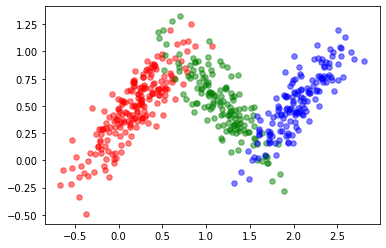

In [91]:
# plot generated data        
for i in range(3):
    plt.scatter(org_data[org_data[:,2]==i][:,0], org_data[org_data[:,2]==i][:,1], s=30, c=c[i], alpha=0.5)

これにはカラーリングするためのラベル、"正解ラベル"がくっ付いてしまっているので、除きます。  
本来は、この正解ラベルはないデータとして捉えるべきですが、便宜上、擬似データがどういったものかを上記、可視化するためにつけていました。

In [92]:
# クラスタの"正解ラベル"を除いたものを、dataに格納する
data = org_data[:,0:2].copy()

まず、このデータがどういったデータかはわからないので、クラスター中心を乱雑に決めて、初期化します。

In [93]:
# muを初期化する
max_x, min_x = np.max(data[:,0]), np.min(data[:,0])
max_y, min_y = np.max(data[:,1]), np.min(data[:,1])
mu = np.c_[rd.uniform(low=min_x, high=max_x, size=K), rd.uniform(low=min_y, high=max_y, size=K) ]
print('init mu:\n', mu)

init mu:
 [[ 0.62943418  0.32095161]
 [-0.58760387  0.84842258]
 [ 1.78964936  0.32160232]]


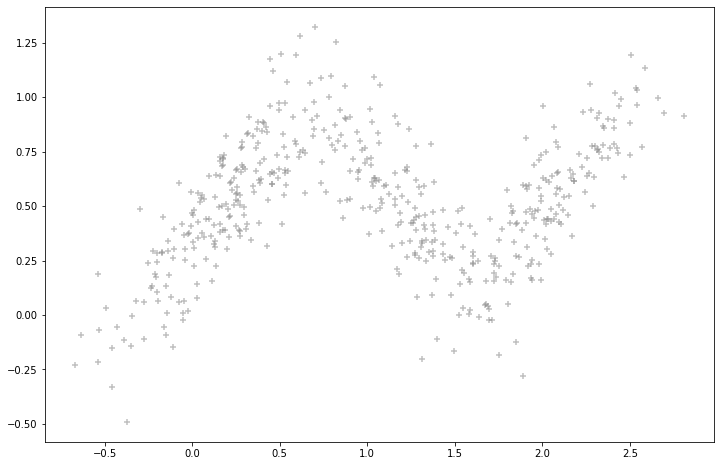

In [94]:
# "答えのわからない"データになったかどうか確認します
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], s=30, c='gray', alpha=0.5, marker="+")

Text(0.5, 1.0, 'initial state')

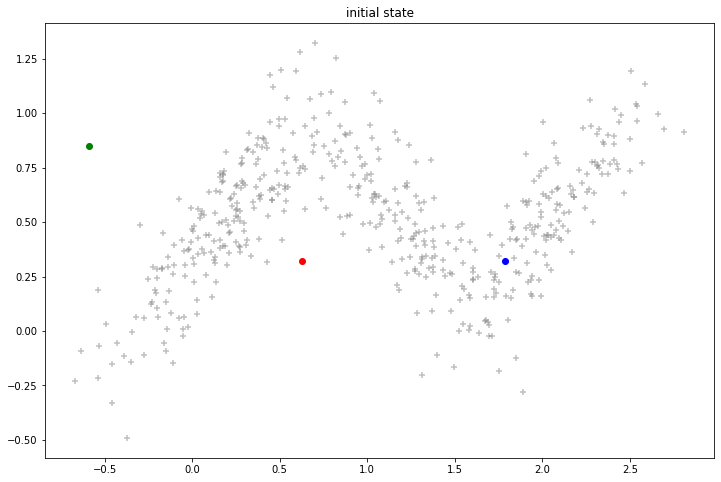

In [96]:
# 乱雑に、大雑把にクラスター中心を決めたことを確認します(初期状態)
plt.figure(figsize=(12,8))
plt.scatter(data[:,0], data[:,1], s=30, c='gray', alpha=0.5, marker="+")
for i in range(3):
    plt.scatter([mu[i, 0]], [mu[i, 1]], c=c[i], marker='o')
plt.title('initial state')

カラーを辞書として用意しておきます

In [98]:
color_dict = {0: 'r', 1: 'g', 2: 'b'}

**k平均法によるクラスタリング手順**  
何らかの手段でクラスター中心を大体予想しておいて、それらを$\mu_{1}, ... , \mu_{k}$とします。  
1) $n=1, ... , N$について、$x^{n}$に一番近いクラスター中心を見つけ、そのクラスターに$x^{(n)}$を所属させます。  
2) $c=1, ... , k$について、クラスター中心ベクトル$\mu_{c}$を、所属メンバーの平均として次のように計算します。
$$
\mu_{c} = \frac{1}{N_{c}} \sum_{cの所属メンバー}x^{(n)}
$$
3) 1)に戻る  
  
これを忠実に実装します

diff:
 [[ 0.06950521  0.08688548]
 [ 0.12803912  0.01170274]
 [-0.02302794 -0.00251512]]


/Users/Toki/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


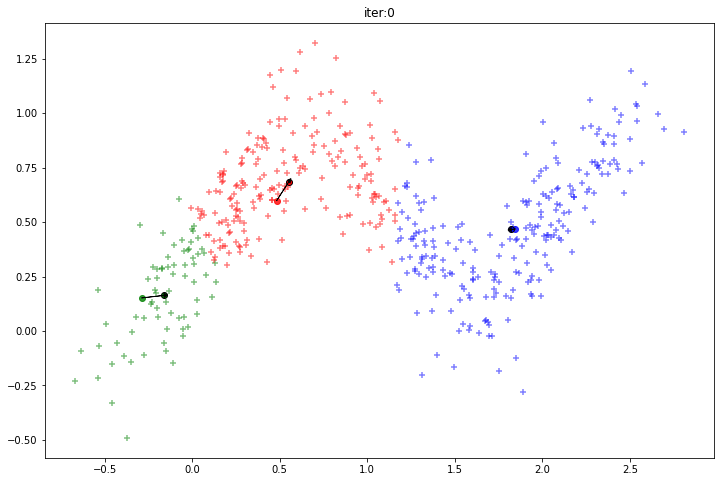

diff:
 [[ 0.04708575  0.02418917]
 [ 0.05488157  0.05488949]
 [ 0.00283139 -0.00053478]]


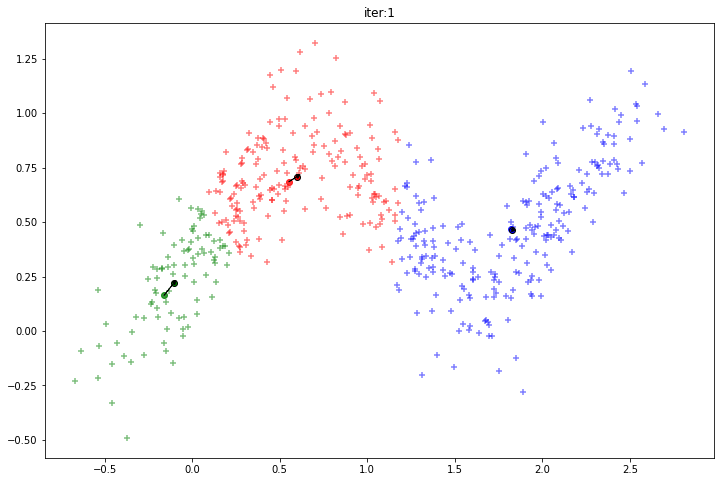

diff:
 [[ 0.05096011  0.01245199]
 [ 0.03674644  0.0297716 ]
 [ 0.01946525 -0.00463088]]


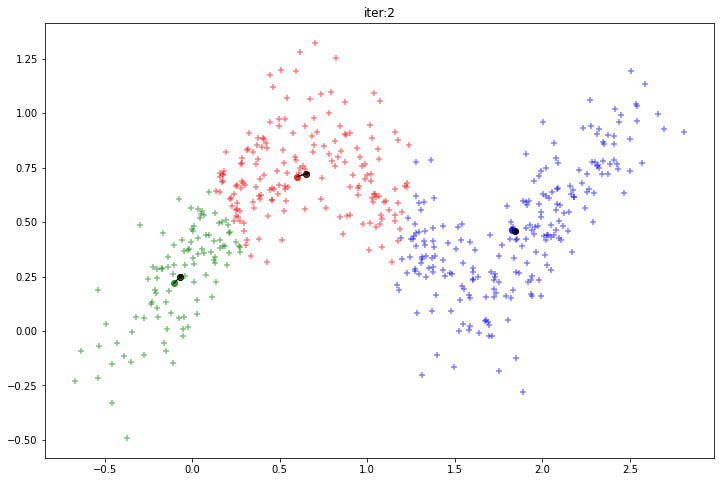

diff:
 [[ 0.03287941  0.0128977 ]
 [ 0.03177296  0.02500753]
 [ 0.00555113 -0.00128395]]


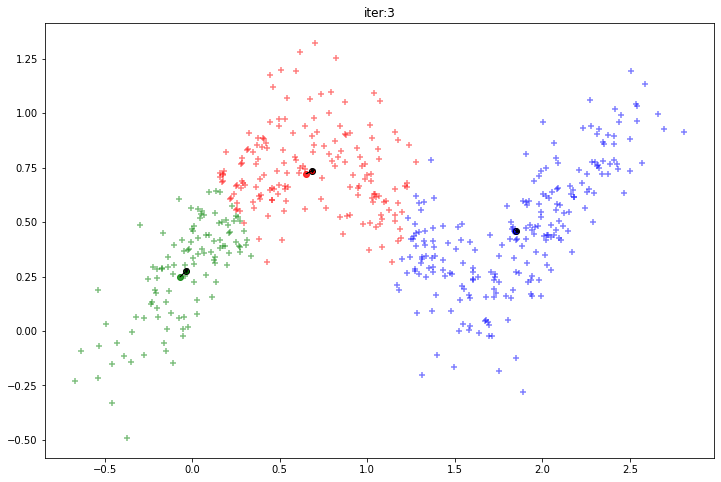

diff:
 [[0.05346943 0.00458939]
 [0.03164879 0.03982927]
 [0.00898835 0.00147173]]


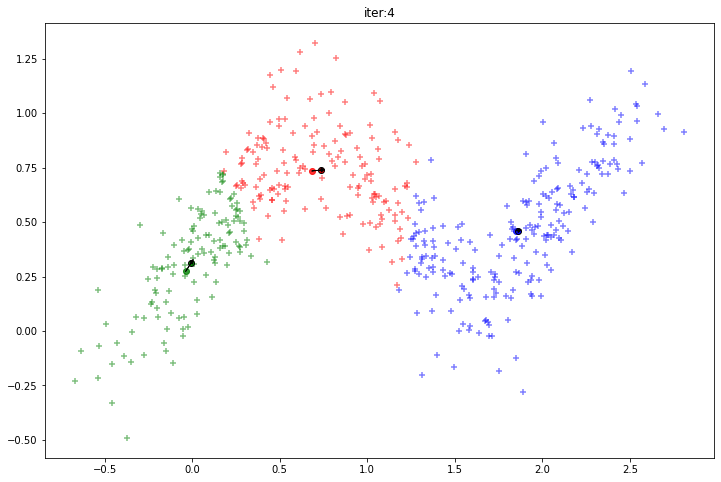

diff:
 [[ 0.03207749 -0.00444306]
 [ 0.01183645  0.01575871]
 [ 0.01143424  0.00015237]]


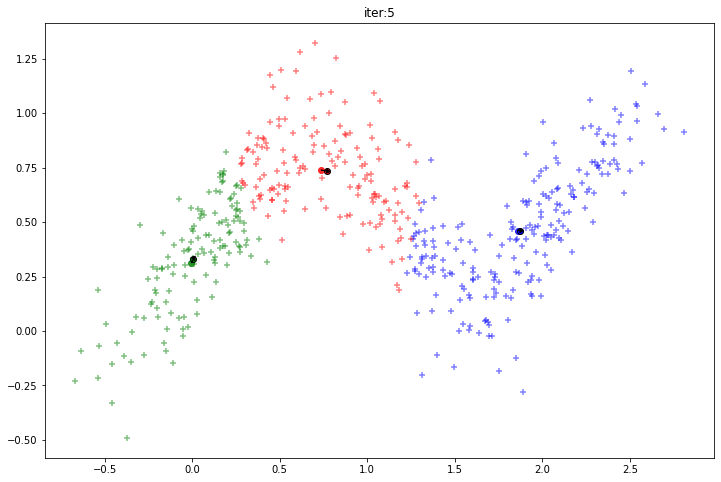

diff:
 [[ 0.04040346 -0.01048771]
 [ 0.01125388  0.01120005]
 [ 0.02314092 -0.00027676]]


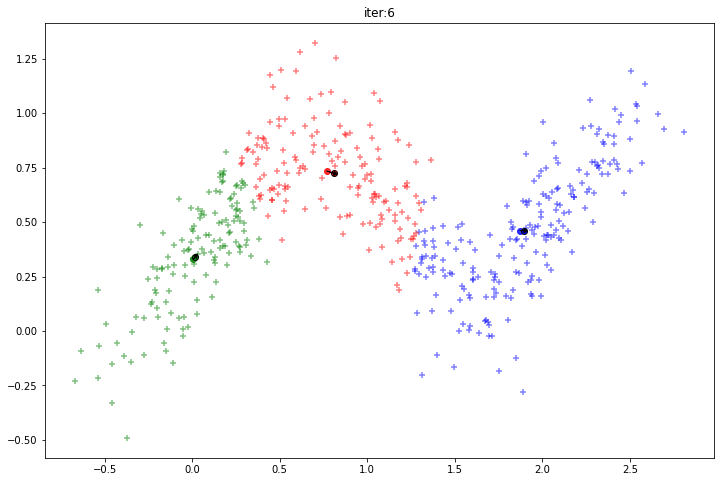

diff:
 [[ 0.02500529 -0.01118491]
 [ 0.00564555  0.00926624]
 [ 0.0151707   0.00154285]]


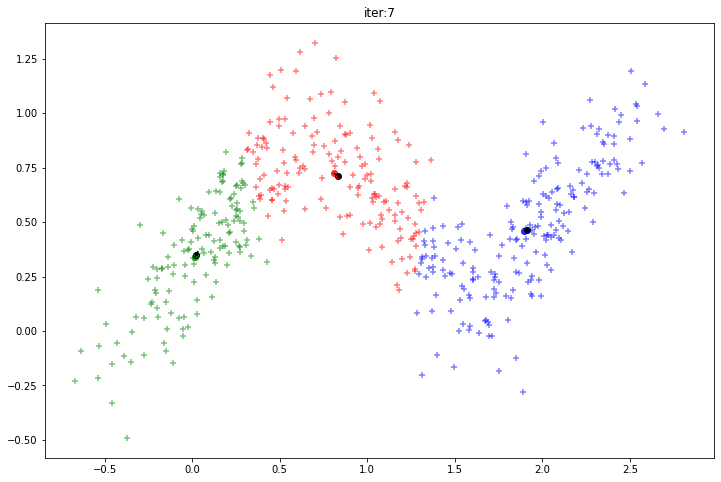

diff:
 [[ 0.0177174  -0.00473519]
 [ 0.00738382  0.00582635]
 [ 0.00904419  0.00128751]]


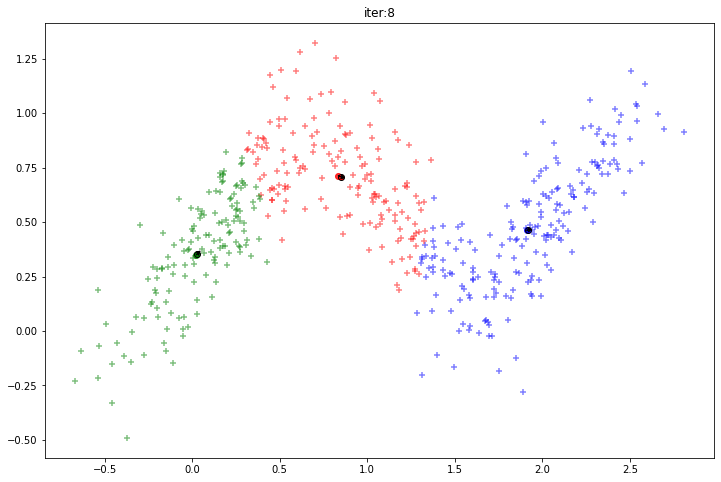

diff:
 [[ 0.02364936 -0.00879548]
 [ 0.007126    0.00623989]
 [ 0.01535144  0.00175121]]


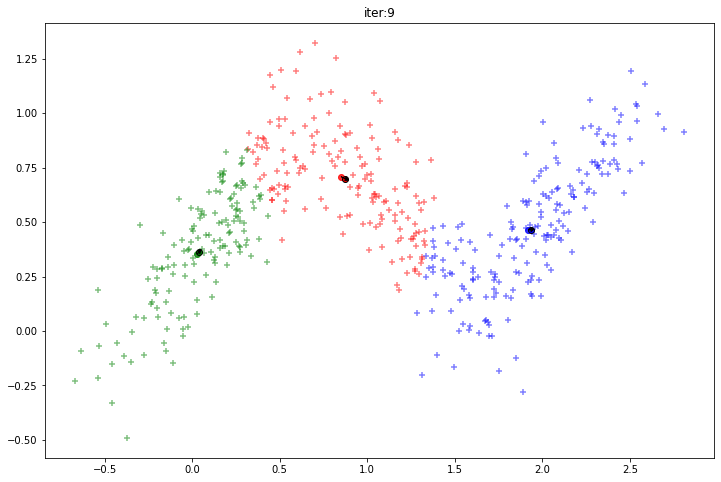

diff:
 [[ 0.01181915 -0.00821436]
 [ 0.00192101  0.0032079 ]
 [ 0.00955199  0.00264965]]


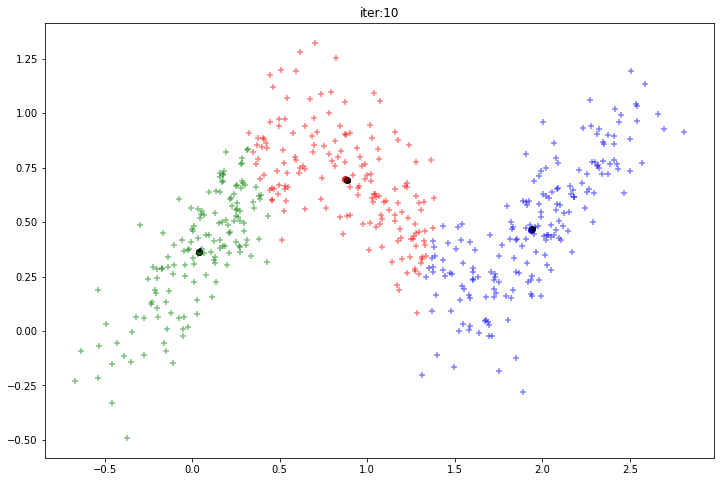

diff:
 [[ 0.01818293 -0.00818914]
 [ 0.00649823  0.00789624]
 [ 0.00951366  0.00243806]]


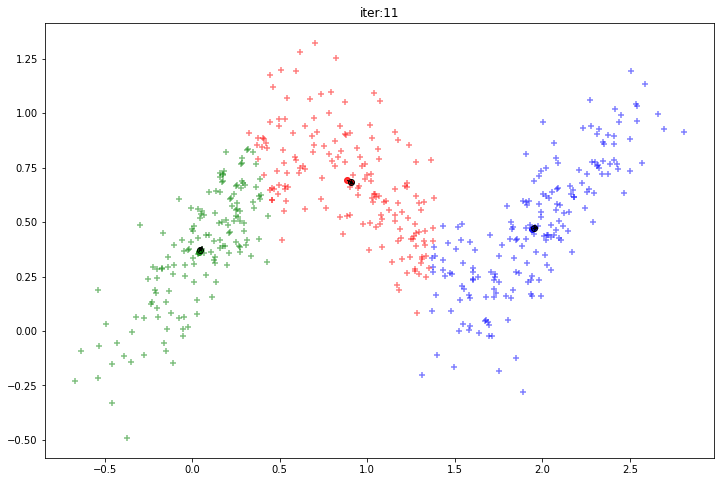

diff:
 [[ 0.01508316 -0.00441085]
 [ 0.00699563  0.00649512]
 [ 0.00627344  0.00120233]]


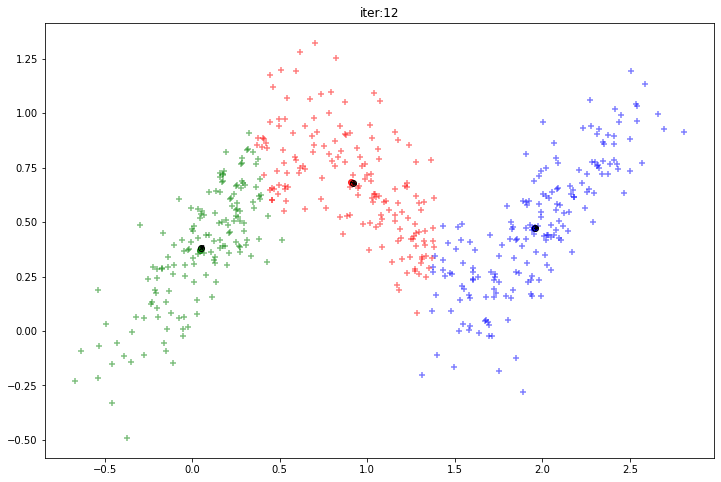

diff:
 [[ 0.02399598 -0.0071716 ]
 [ 0.0117918   0.00956269]
 [ 0.00962487  0.0027897 ]]


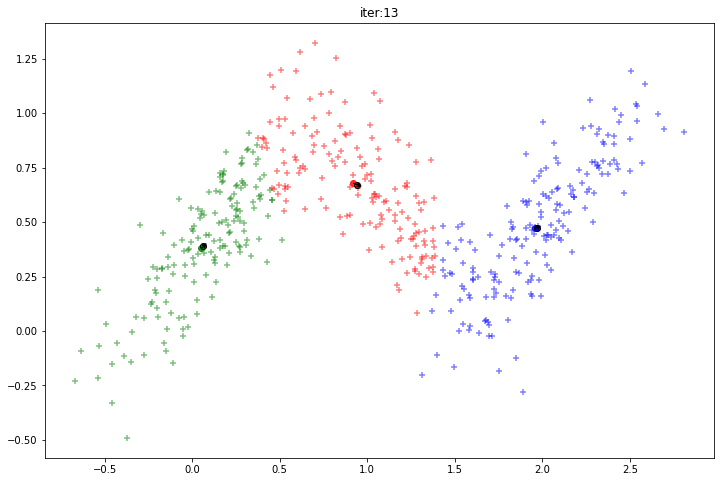

diff:
 [[ 1.32233935e-02 -3.55356658e-03]
 [ 6.41309371e-03  7.54751166e-03]
 [ 2.97812438e-03 -5.19328541e-05]]


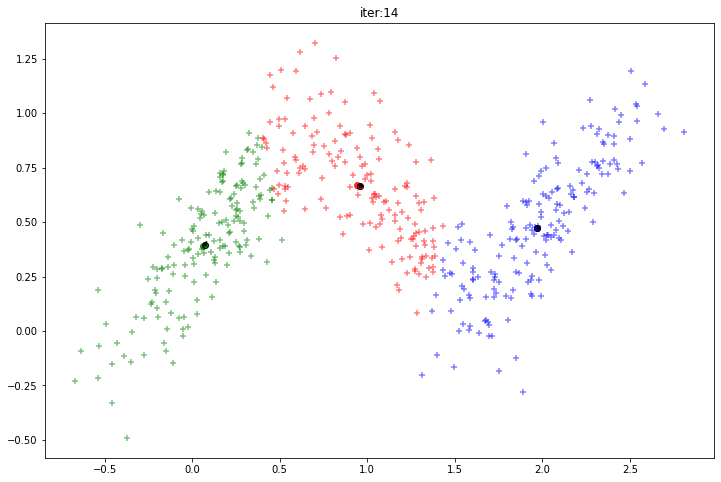

diff:
 [[ 0.01149602 -0.01043469]
 [ 0.00442917  0.00455489]
 [ 0.00708065  0.00594806]]


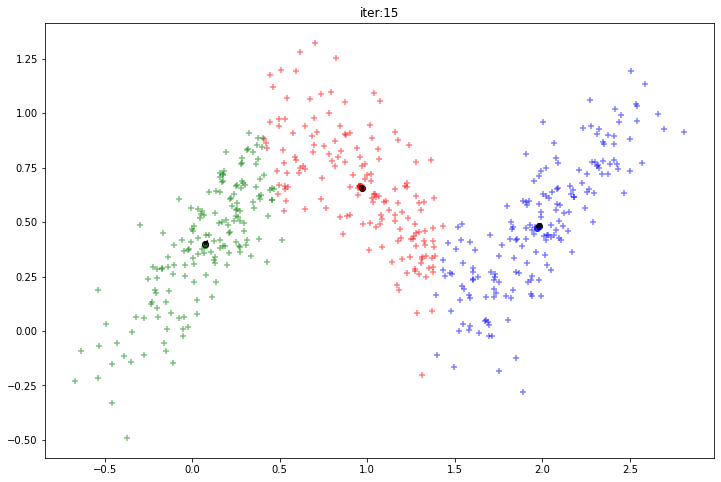

diff:
 [[ 0.01934241 -0.00902834]
 [ 0.00858935  0.00958408]
 [ 0.00644904  0.00268024]]


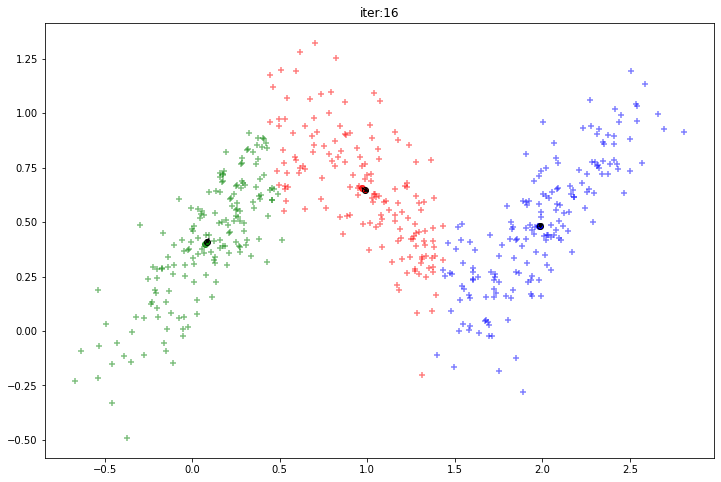

diff:
 [[ 0.0090368  -0.00190254]
 [ 0.00501777  0.00235958]
 [ 0.00315781  0.00117121]]


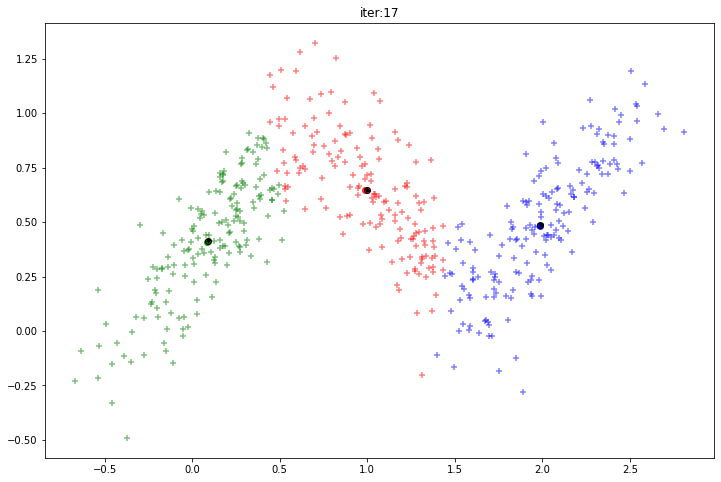

diff:
 [[ 0.00630569 -0.00213207]
 [ 0.00231516  0.00187463]
 [ 0.00302835  0.00046982]]


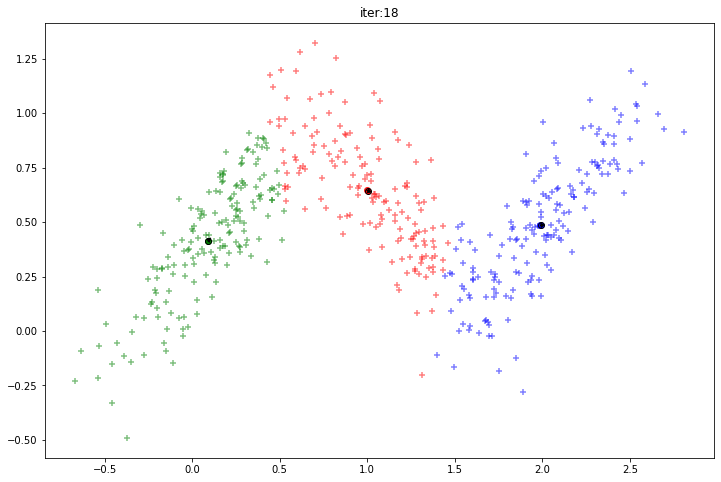

diff:
 [[ 0.00283069 -0.00250127]
 [ 0.          0.        ]
 [ 0.00316213  0.00133369]]


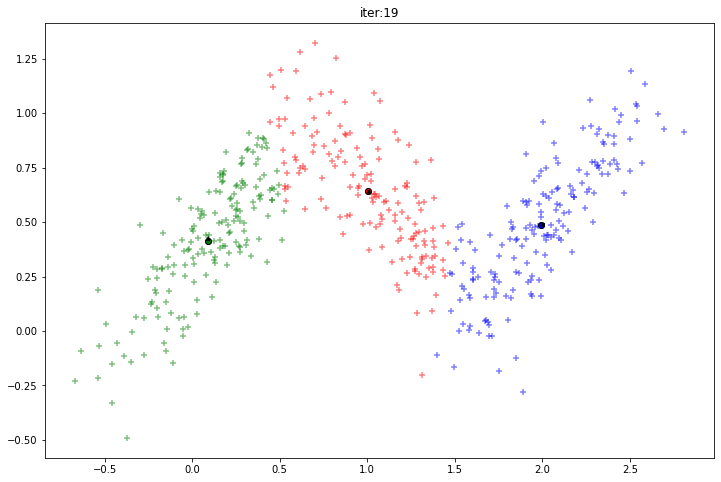

diff:
 [[0. 0.]
 [0. 0.]
 [0. 0.]]


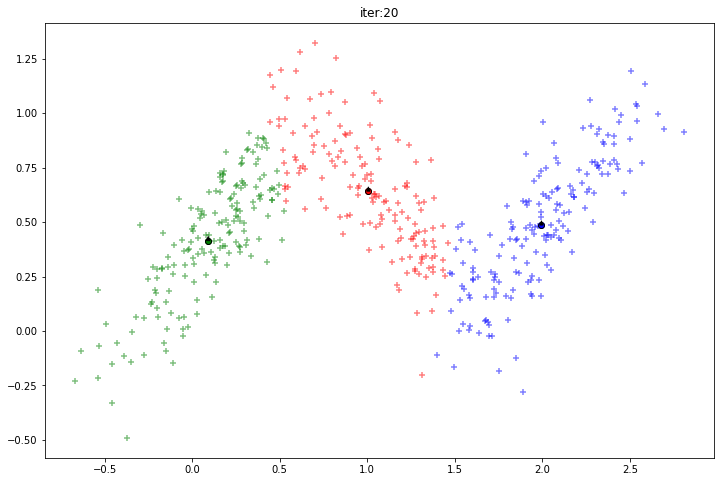

mu is converged.


In [99]:
for _iter in range(100):
    # Step 1
    # クラスター中心を見つけるための箱を用意して、各点とクラスター中心との距離をそれぞれ算出します
    r = np.zeros(N)
    for i in range(N):
        r[i] = np.argmin([np.linalg.norm(data[i]-mu[k]) for k in range(K)])

    # Step 2
    # 算出前後で、クラスター中心との距離を比較(差分)を算出します
    cnt = dict(Counter(r))
    N_k = [cnt[k] for k in range(K)]
    mu_prev = mu.copy()
    mu = np.asanyarray([np.sum(data[r == k],axis=0)/N_k[k] for k in range(K)])
    diff = mu - mu_prev
    print('diff:\n', diff)

    # クラスター中心の移動を可視化します
    plt.figure(figsize=(12,8))
    for i in range(N):
        plt.scatter(data[i,0], data[i,1], s=30, c=color_dict[r[i]], alpha=0.5, marker="+")

    for i in range(K):
        ax = plt.axes()
        ax.arrow(mu_prev[i, 0], mu_prev[i, 1], mu[i, 0]-mu_prev[i, 0], mu[i, 1]-mu_prev[i, 1],
                  lw=0.8,head_width=0.02, head_length=0.02, fc='k', ec='k')
        plt.scatter([mu_prev[i, 0]], [mu_prev[i, 1]], c=c[i], marker='o', alpha=0.8)
        plt.scatter([mu[i, 0]], [mu[i, 1]], c=c[i], marker='o', edgecolors='k', linewidths=1)
    plt.title("iter:{}".format(_iter))
    plt.show()
    
    # 距離差分が、0.0001より小さくなったら、十分クラスタリングできたと判断して繰り返しを終わります
    if np.abs(np.sum(diff)) < 0.0001:
        print('mu is converged.')
        break